# Neural network (45 minutes)
ACPSEM Machine Learning Workshop 2019, 29 - 31 May 2019

Yu Sun, yu.sun@sydney.edu.au

University of Sydney

In this session, we will look at fully connect neural network in these aspects:

* trainable parameters
* learning compacity
* activation functions



## Data (10 minutes)
First let's generate some data for the learning task. We will use the functions in `sklearn` to do that.

In [0]:
# Import sklearn and components in matplotlib
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
plt.style.use('ggplot')

In [0]:
# Generate the data
#  By default it's a 2D dataset 
#  (i.e. two features and one label for each sample)
X, y = datasets.make_circles(noise=0.2, factor=0.5, random_state=1)
# Normalisation
X = (X - X.mean(0)) / X.std(0)

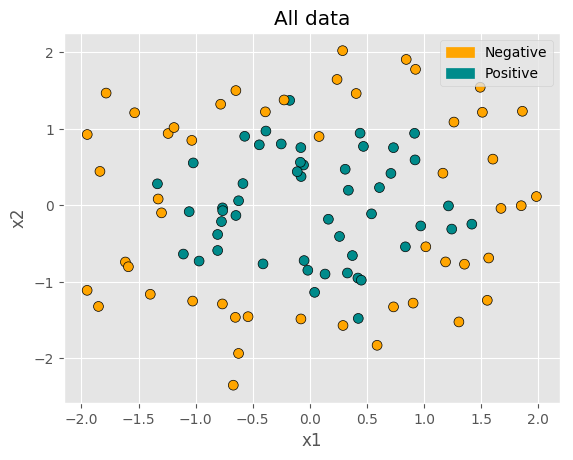

In [0]:
# Visualise the data
# First we define a function to do the scatter plot
def plotData(x, y, title='Title'):
  'Scatter plot of the x, colour indicated by y'
  plt.scatter(x[:,0], x[:, 1], 
              c=y, 
              cmap=ListedColormap(['orange', 'darkcyan']), # for 0 and 1
              edgecolors='k',
              s=50)
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.title(title)
  patches = (mpatches.Patch(color='orange', label='Negative'),
             mpatches.Patch(color='darkcyan', label='Positive'))
  plt.legend(handles=patches)
  plt.show()

# Plot the data
plotData(X, y, 'All data')

In [0]:
# Data partitioning
#  Split into training data and test data
from sklearn.model_selection import train_test_split
trData, tsData, trLabel, tsLabel = train_test_split(X, y, 
                                                    random_state=0,
                                                    test_size=0.3)

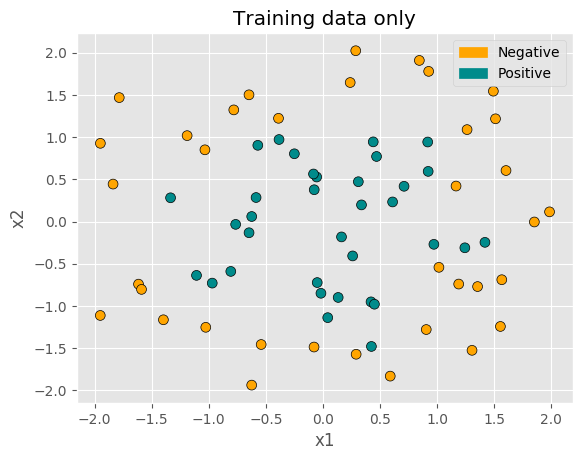

In [0]:
# Plot the training data
#  and also test the plotData() function
plotData(trData, trLabel, 'Training data only')

## Trainable parameters (5 minutes)
(This is a on-paper exercise.)

We have generated the data (2D), which goes directly into the input layer of the neural network. We also know the output which is one neuron. Hence given the hidden layer structure, we can compute the trainable parameters.

Draw the structure of the network and compute the number of trainable parameters for the following hidden layers:
  * (5, 1)
  * (2, 4)
  * (4, 2)
  * (1, 5)
  
What pattern do you find? Discuss with your neighbours.

## Learning capacity (20 minutes)
Let's defined our first network and fit the data. The `score()` method will return the accuracy given the test data and test labels.

In [0]:
# Define the first network
# Import the neural network class
from sklearn import neural_network

# Define the network
# Key argument is the hidden_layer_sizes
nn = neural_network.MLPClassifier(activation='relu',
                                  hidden_layer_sizes=(50,50,10),
                                  random_state=0,
                                  solver='sgd',
                                  max_iter=50000)

# Fit the model
nn.fit(trData, trLabel)

# Get the accuracy
score = nn.score(tsData, tsLabel)
print("The model achieved an accuracy of %.2f" % score)

The model achieved an accuracy of 0.87


In [0]:
# The score is calculated as:
pred = nn.predict(tsData)
acc = (pred == tsLabel).sum() / len(pred)
print("Manual calculation of the accuracy: %.2f" % acc)

Manual calculation of the accuracy: 0.87


In [0]:
# Print out the hidden layer structure
nn.hidden_layer_sizes

(50, 50, 10)

We can define a function to plot the decision boundary (method referred to [this sklearn example](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py)).

In [0]:
# Import numpy
import numpy as np

def plotDecBnd(nn, title="title"):
  'Plot the decision boundary.'
  
  # Creating the grid
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                           np.arange(y_min, y_max, 0.5))
  Z = nn.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

  # Plot the grid
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=.8)
  
  # Plot the training data
  plt.scatter(trData[:, 0], trData[:, 1], c=trLabel,
              cmap=ListedColormap(['orange', 'darkcyan']),
              edgecolors='w', s=80)
  
  # Plot the testing data
  # Test data has a smaller shape (s=40)
  plt.scatter(tsData[:, 0], tsData[:, 1], c=tsLabel, 
              cmap=ListedColormap(['orange', 'darkcyan']),
              edgecolors='w', alpha=0.6, s=40) 
  patches = (mpatches.Patch(color='orange', label='Negative'),
             mpatches.Patch(color='darkcyan', label='Positive'))
  plt.legend(handles=patches)
  plt.title(title)
  plt.show()

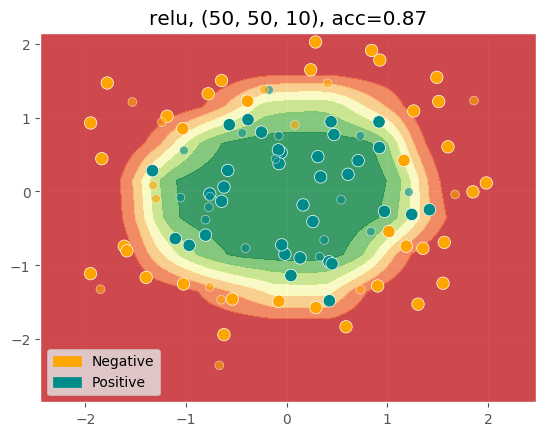

In [0]:
# Plot the decision boundary
plotDecBnd(nn, 'relu, %s, acc=%.2f' % (nn.hidden_layer_sizes, score))

Exercise:
* Create another network (refer to the code above)
* Modify the hidden layer structure
* Fit the model and calculate the accuracy
* Plot the decsion boundary and observe the difference

Use the [playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.21726&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) to assess the learning capacity and the network structure.

## Activation function (10 minutes)
This part examines the choice of an activation function. In the previous example, we used the `relu` (retified linear unit) as the activation function. Let's now change that to an identity function (i.e. no activation function), and observe the consequence.

In [0]:
# No activation function
nn_linear = neural_network.MLPClassifier(activation='identity',
                                         hidden_layer_sizes=(10,10),
                                         random_state=0,
                                         max_iter=10000)

# Fit the model
nn_linear.fit(trData, trLabel)

# Get the accuracy
score_linear = nn_linear.score(tsData, tsLabel)
print("The model achieved an accuracy of %.2f" % score_linear)

The model achieved an accuracy of 0.50


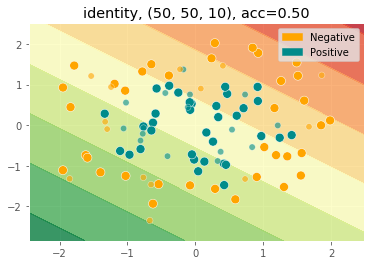

In [0]:
# Plot the decision boundary
plotDecBnd(nn_linear, 'identity, %s, acc=%.2f' % (nn.hidden_layer_sizes, 
                                              score_linear))

Try other options for activation functions:
* tanh
* logistic



---


This is the end of this tutorial.